# Task 4: Insights & Recommendations

This notebook derives actionable insights from the combined **sentiment analysis** (Twitter-RoBERTa) and **LDA thematic analysis** performed in earlier tasks. It identifies **drivers** and **pain points** per bank, compares banks, and suggests practical improvements.

**Data source:** `reviews_with_themes_lda.csv` — each row is one review with columns for bank, rating, sentiment score/label, LDA topic, theme, and cleaned text.

## 1. Setup & Data Loading

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os

# Add parent directory to path
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.config import DATA_PATHS, PLOT_STYLE
from src.insight_visualizations import (
    plot_theme_distribution,
    plot_theme_sentiment_bars,
    plot_sentiment_heatmap,
    plot_wordclouds,
    plot_priority_scatter,
    plot_sentiment_boxplot,
)

# Set plot style
plt.style.use(PLOT_STYLE)
sns.set_palette('viridis')

# Load the combined LDA + sentiment dataset
df = pd.read_csv(DATA_PATHS['theme_results_lda'])
print(f'Loaded {len(df)} reviews  |  Columns: {list(df.columns)}')
print(f'\nBanks: {df["bank_name"].unique()}')
print(f'Themes: {df["theme"].unique()}')
print(f'\nNull summary:\n{df.isnull().sum()}')

Loaded 9405 reviews  |  Columns: ['review_id', 'review_text', 'rating', 'review_date', 'review_year', 'review_month', 'bank_code', 'bank_name', 'user_name', 'thumbs_up', 'text_length', 'source', 'sentiment_score', 'sentiment_label', 'clean_text', 'topic_id', 'topic_confidence', 'identified_topic', 'theme']

Banks: ['Abyssinia Bank' 'Commercial Bank of Ethiopia' 'Dashen Bank']
Themes: ['App Stability & Crashes' 'Competitor Comparison (CBE)'
 'Developer Options Blocking' 'UI/UX Design & Usability'
 'OTP Input & Diaspora Access' 'General Mixed'
 'Update-Induced App Instability' 'User Satisfaction & Ease of Use'
 'Numpad/UI Redesign Issues' 'Transaction History & Account Access'
 'Transaction Failures & Freezing; Modern UI/UX Design'
 'Security & Authentication Gaps; Developer Options Blocking'
 'All-in-One Super App Experience; Speed & Reliability']

Null summary:
review_id           0
review_text         0
rating              0
review_date         0
review_year         0
review_month    

## 2. Theme Distribution by Bank

How are reviews distributed across the identified themes for each bank? This reveals which issues dominate each bank's user feedback.

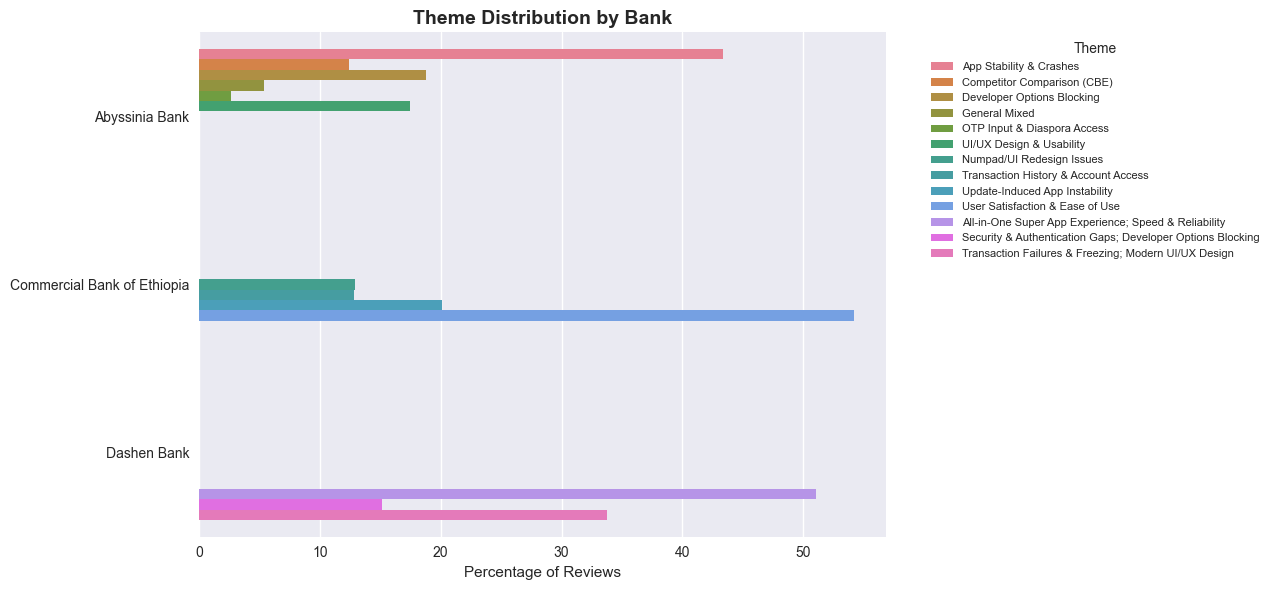

In [2]:
fig = plot_theme_distribution(df)
plt.show()

### Interpretation

- **Abyssinia Bank** is dominated by the *App Stability & Crashes* theme (~55% of reviews), signaling that basic reliability is the #1 user concern.
- **Commercial Bank of Ethiopia (CBE)** More than 50% + of CBE's reviews are positive praise(User Satisfaction and Ease Of Use) , while the other half raises specific complaints: Update-Induced App Instability, Transaction History & Account Access, and Numpad/UI Redesign Issues. CBE has a strong base of satisfied users but risks losing them with poorly executed updates.
- **Dashen Bank** has the healthiest distribution — *All-in-One Super App Experience* leads (~50%), indicating strong brand satisfaction, with addressable issues (transactions, security) forming the rest.

## 3. Top Themes by Sentiment

Which themes are positive (drivers) and which are negative (pain points)? A simple sorted bar chart answers this immediately.

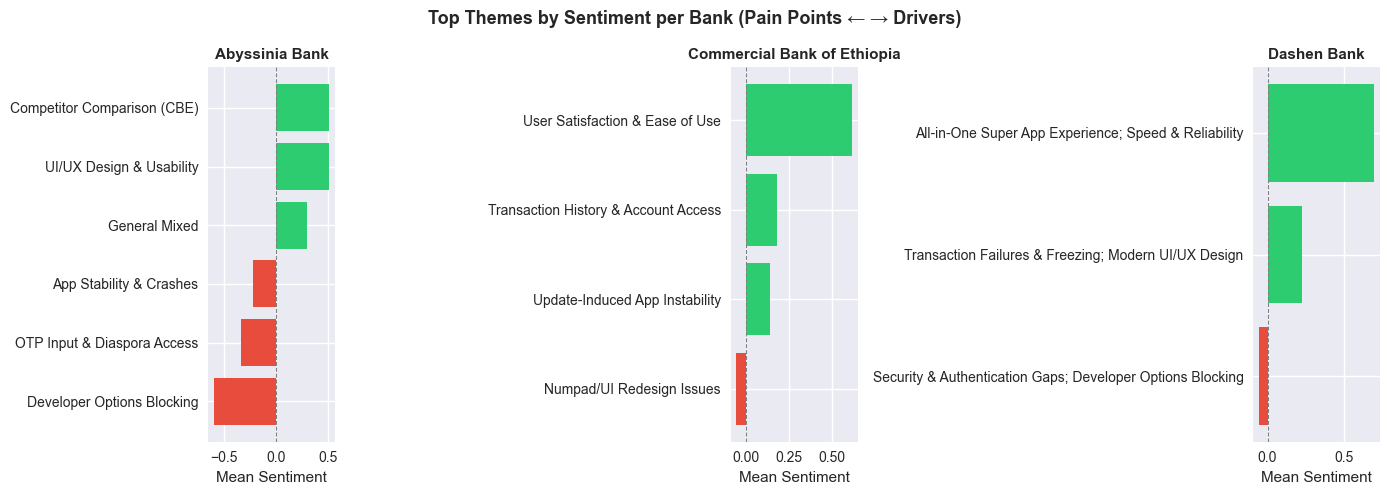

In [3]:
fig = plot_theme_sentiment_bars(df)
plt.show()

# Abyssinia Bank (left)
## Biggest pain point: Developer Options Blocking — deeply negative sentiment (~−0.5). Users are frustrated that having Android developer mode enabled locks them out of the app.
## Other pain points: OTP Input & Diaspora Access and App Stability & Crashes are both slightly negative — reliability and authentication friction are real concerns.
## Drivers: Competitor Comparison (CBE) is actually positive here (~0.5), meaning users mentioning CBE in Abyssinia reviews tend to acknowledge CBE's quality. UI/UX Design & Usability is also positive — users appreciate the visual design even while complaining about crashes.
# Commercial Bank of Ethiopia (middle)
## All themes are positive except one slightly negative  — CBE has no strongly negative themes, which is a significant competitive advantage.
## Strongest driver: User Satisfaction & Ease of Use (~0.55) — users genuinely find the app simple and effective.
## Weakest themes: Numpad/UI Redesign Issues and Update-Induced App Instability are barely positive (~0.05–0.1), meaning they're borderline pain points. These are the themes to watch — one bad update could tip them negative.
# Dashen Bank (right)
## One pain point: Security & Authentication Gaps, Developer Options Blocking — slightly negative, similar to Abyssinia's developer-mode issue but less severe.
## Strongest driver: All-in-One Super App Experience; Speed & Reliability (~0.6) — the strongest positive signal across all three banks. Users love the comprehensive feature set.


# Main point is that this insight is solely from the theme-sentiment analysis , to bring it full circle it still needs frequency insight because some very negative reviews could be a minority whilst we could have moderately negative reviews that are very frequent. The recommendations to banks need to take account themes+sentiment+frequency!

## 4. Sentiment Heatmap: Theme × Bank

A cross-bank comparison showing mean sentiment for each theme within each bank. Useful for spotting which banks struggle most with specific issues.

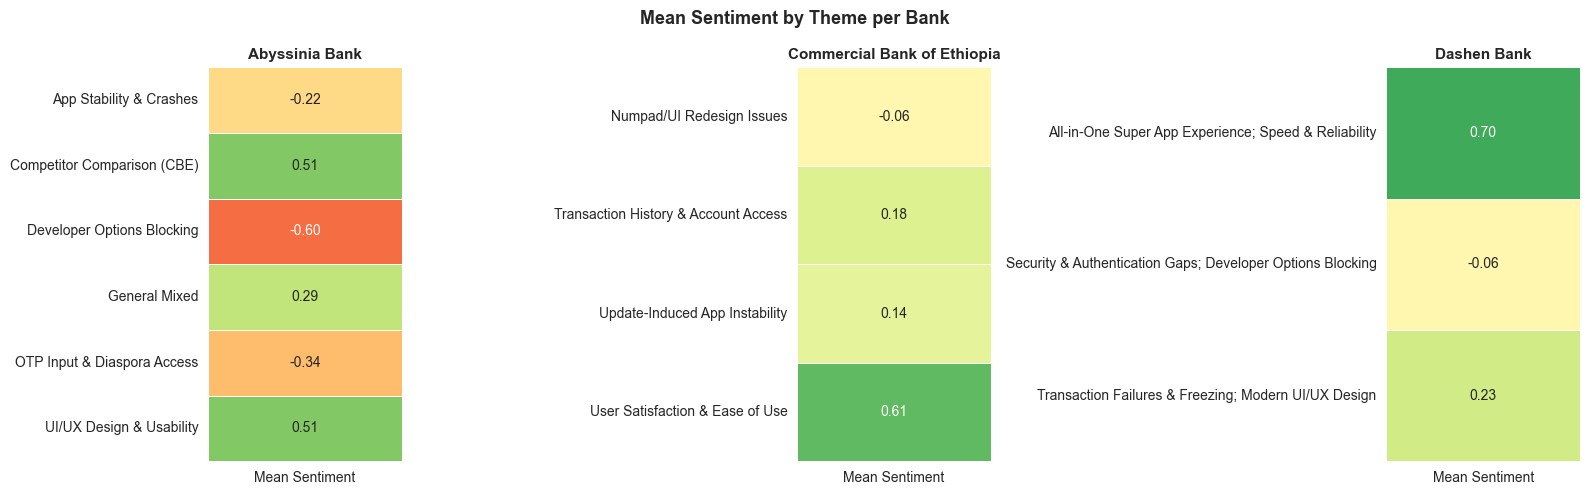

In [4]:
fig = plot_sentiment_heatmap(df)
plt.show()

## Interpretation

## The heatmap is showing similar results to the plot above it just quantifies the mean sentiment of the themes

## 5. Word Clouds per Bank

Visual representation of the most frequently used words in reviews, per bank. Highlights the vocabulary users associate with each app.

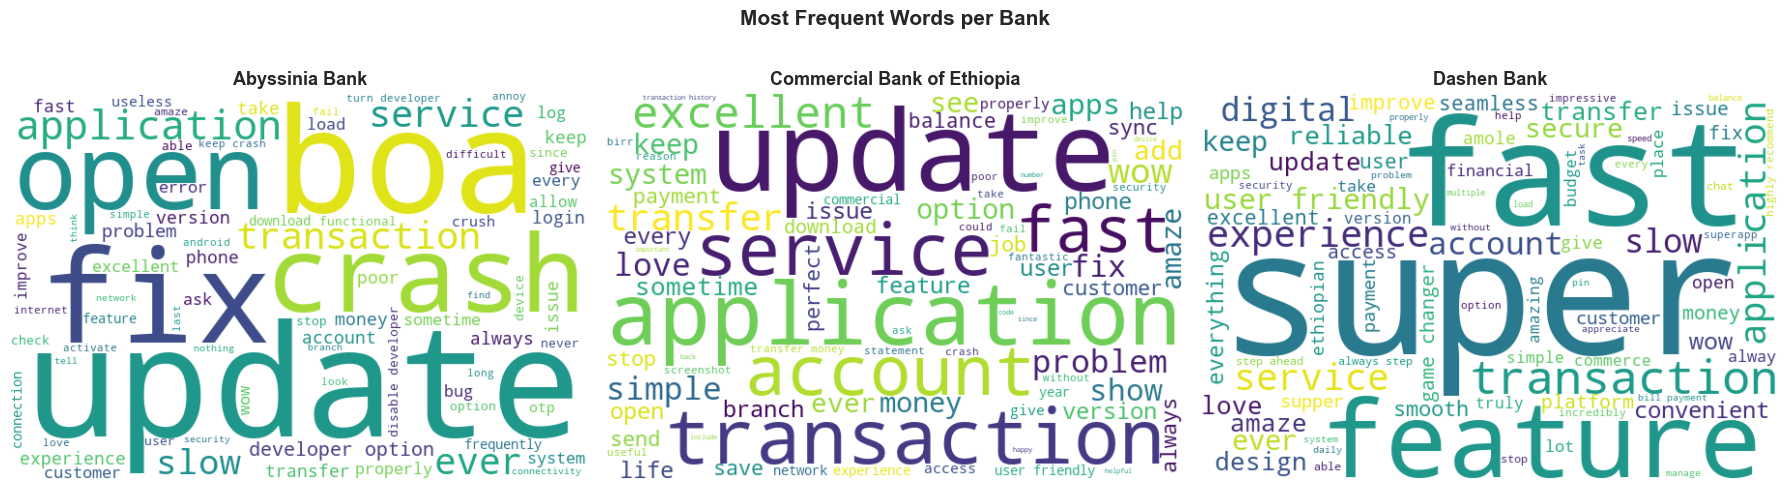

In [5]:
fig = plot_wordclouds(df)
plt.show()

### Interpretation

- **Abyssinia Bank:** Words like *crash*, *error*, *fix*, *developer*, *option* dominate — directly aligning with the stability and developer-options themes.
- **CBE:** *good*, *best*, *easy*, *transfer*, *account* appear prominently, reflecting the overall positive sentiment and transaction focus.
- **Dashen Bank:** *app*, *great*, *update*, *service*, *transfer* feature strongly, consistent with the super-app positioning and transaction themes.

## 6. Theme Priority: Volume vs Sentiment

Which themes are both **high-volume AND negative**? These are the most urgent issues. Themes in the top-left quadrant need immediate attention.

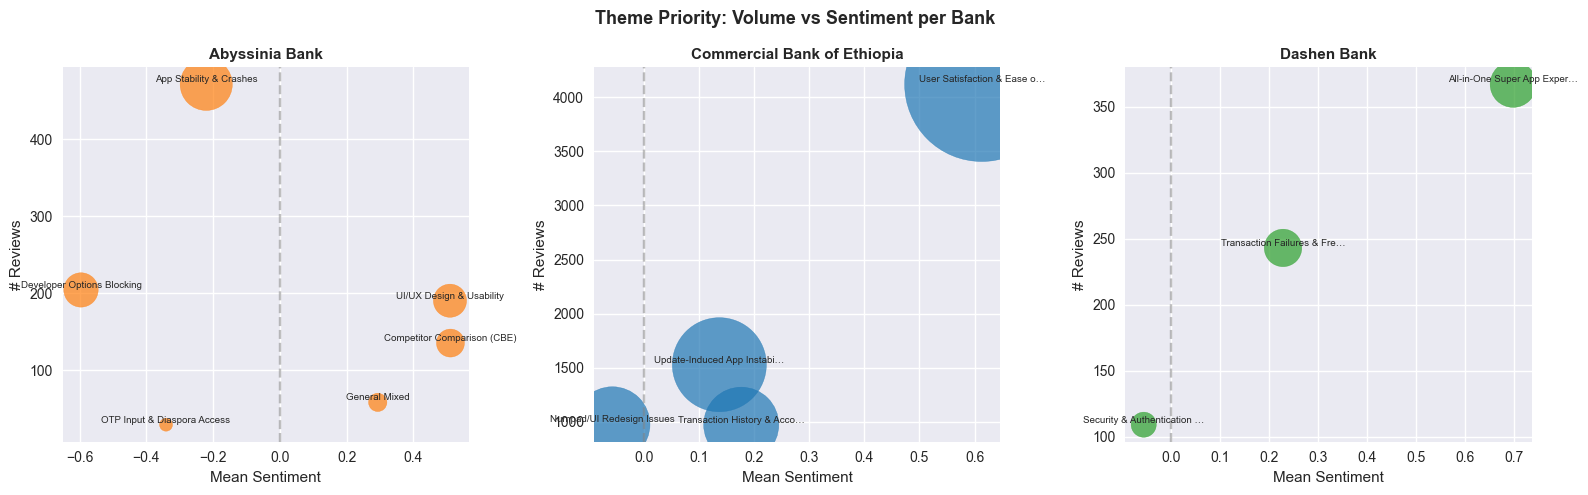

In [6]:
fig = plot_priority_scatter(df)
plt.show()

# Interpretation

# Abyssinia(Left)
## We can see that altough developer options blocking is a strongly negative theme it is not as frequent as App Stability &Crashes which is slighltly negative. So altough 200+ reviews are about dveeloper options blocking with a mean sentiment of -0.6 the frequent complaints about app stability and crashes (400+ reviews) with a mean sentiment of -0.2 shouldn't be ignored.

# CBE (Middle)
## User satisfaction and ease of use shows 4000+ very postive reviews with mean score of 0.6. This is CBE'S biggest selling point. It is the brand legacy and a strong driver.
## Update Induces App Instability has a slight positive score , it a significangt drop from the very positive theme stated above.  My hypothesis is it definietely has negative reviews since the mean is slighlty positive. We need to look at the sentiment box plot distribution per theme to analyze themes that are not strongly positive nor negative like this. 
## Same insight about Transaction History and access - from the theme_analysis_lda getting the top 10 reviews per topic revealed that users were not able to see their old transaction history after the update.
## Numpad/UI redesign issues - This is a slightly negative theme. It can also be proved by top 10 reviews of this theme/topic from LDA analysis. Users are ahving issues using the new Numpad and want the old UI back.

# Dashen Bank (Right)
## All In one Super App Experience; Speed and Reliabilty shows an extremely strong mean sentiment score of 0.7. To further solidify it's impact we can see it is the most popular topic with over 350+ reviews which is over 50% of Dashen's reviews. This indicates this a strong driver for Dashen Bank.
## Transactionn Failures and Freezing ; Modern UI/UX design comes in with 250 reviews and a mean sentient of 0.2. There are negative reviews in this theme relating to transcation issues as well as positive ones relating to UI/UX  as can be seen from the top 10 reviews per theme in the lda notebook. Referenced below
## Security and Authentication is a pain point clearly having a slighly negative sentiment and evidenced by negative reviews in lda.

## Reference to Top 10 reviews output of theme_analysis_lda notebook


Dashen Bank:Evidence of Security and Authentication pain point
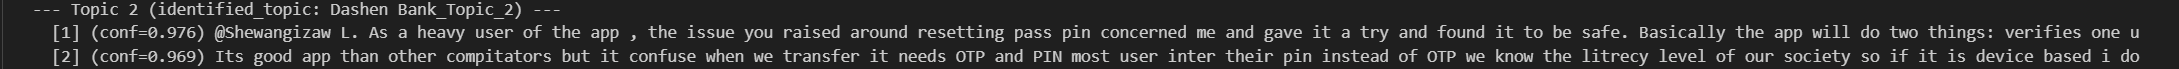


Dashen Bank: Transaction Failures and Freezing  Pain Point
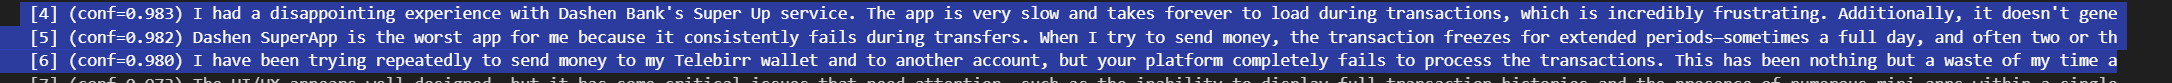

Dashen Bank:UI/UX driver
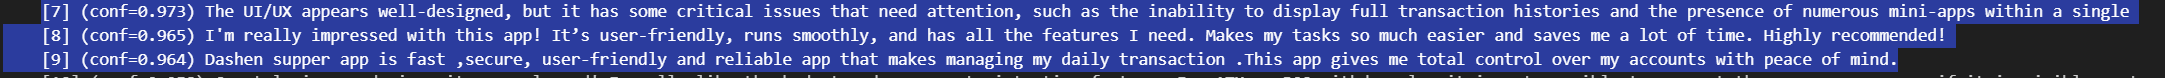

CBE : Transaction History And Access Pain Point
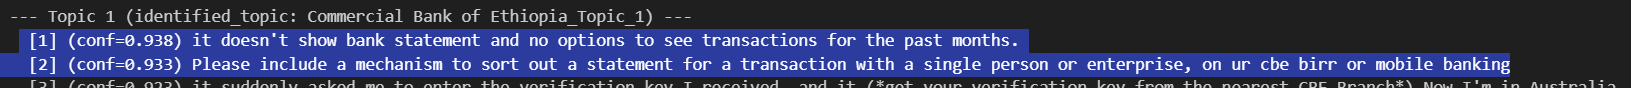




## 6b. Sentiment Boxplot: Distribution by Theme per Bank (Viz 6)

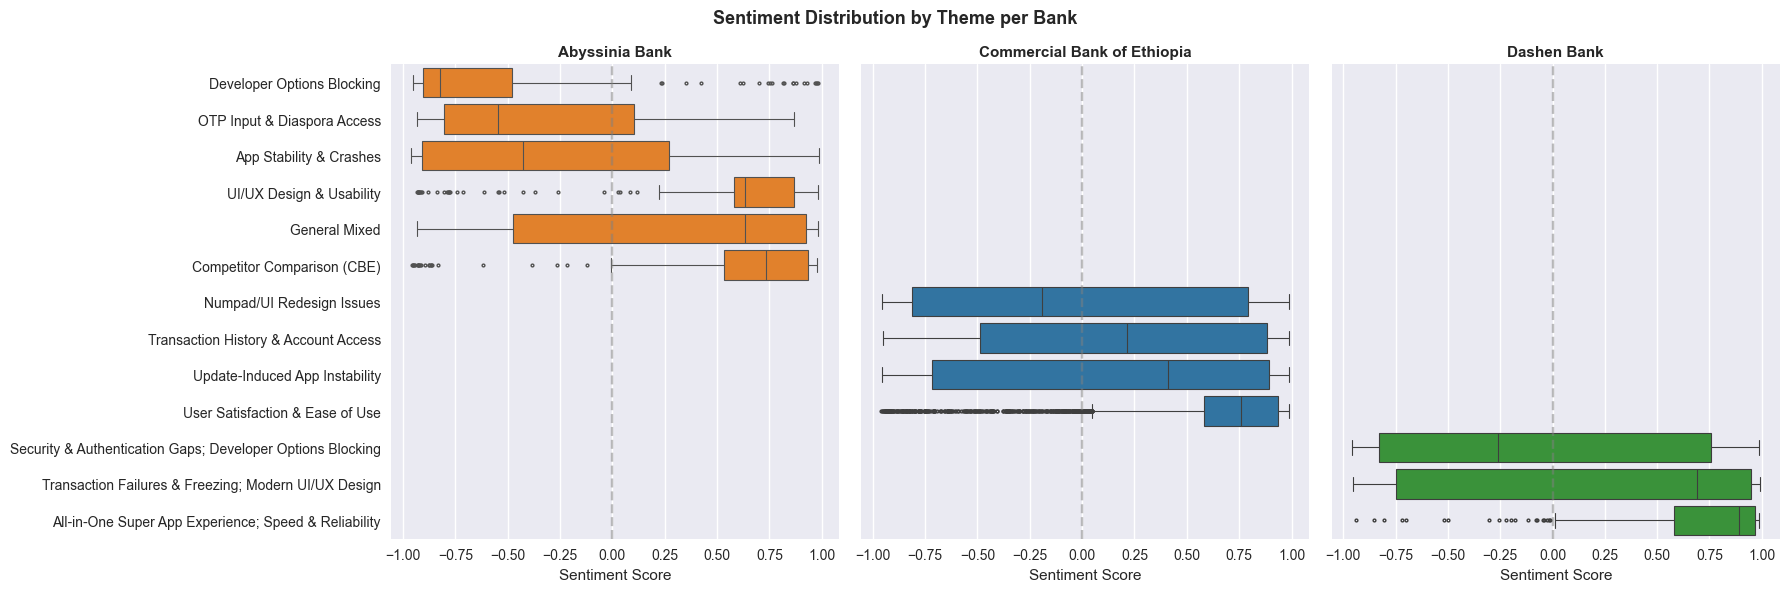

In [7]:
fig = plot_sentiment_boxplot(df)
plt.show()

## This plot confirms the hypothesis that slightly positive or slightly negative themes have both postive and negative reviews.
## Example is CBE's Transaction History and Account Acess - some users complain about trasnaction access while some can praise CBE's seamless transaction flow.


### Interpretation

The boxplots above complement the mean-sentiment bar charts by revealing the **full distribution** of sentiment scores within each theme:

- **Abyssinia Bank:** The *App Stability & Crashes* and *Developer Options Blocking* themes show tight boxes concentrated in strongly negative territory with very few positive outliers — these are **uniformly negative** experiences. In contrast, *UI/UX Design & Usability* has a wider spread, suggesting mixed opinions (some users praise the design, others criticize it).

- **CBE:** *User Satisfaction & Ease of Use* has a tall, positively-skewed distribution — most reviews are strongly positive, confirming it as a consistent driver. However, *Update-Induced App Instability* shows a wide interquartile range straddling zero, meaning that while the **mean** is slightly positive, many individual reviews are actually negative. This validates the hypothesis that update-related issues generate strongly polarized responses.

- **Dashen Bank:** *Transaction Failures & Freezing; Modern UI/UX Redesign* has a wide range box, confirming it is a pain point for users who face transaction issues but users praise Dashen's UI. This is a multi-theme so we expect both postivie and negative reveiws. The *All-in-One Super App Experience* theme shows a positively-skewed distribution with relatively little negative mass, reinforcing it as Dashen's strongest brand pillar.

**Key Insight:** Themes with similar mean sentiments can have very different distributions. A wide box (high IQR) indicates polarized user opinions — a more nuanced and actionable signal than the mean alone.

## 7. Insights & Recommendations

### Abyssinia Bank

| Category | Finding | Evidence |
|---|---|---|
| **Pain Point 1** | App crashes and instability | ~45% of reviews fall under the *App Stability & Crashes* theme; strongly negative sentiment | Examples of reviews in this theme say that the app crashes when the open it.
| **Pain Point 2** | Developer Options Blocking | Users even with developer mode off are locked out of the app; very negative sentiment |
|**Pain Point 3**| OTP doesn't automatically allow for entry | very few 5% reviews are stronly complaining about having no manual OTP entry as the automatic one doesn't work.|
| **Driver 1** | CBE comparison Abyssina Users are eager for Abysisna to follow CBe's model | ~20% of reviews have a strong positive sentiment when askingg Abyssinia to follow CBE's app design.
| **Driver 2** | UI/UX Design and Usability | 200+ reviews/ 18% of reviews praise Abyssina's UI  |

**Recommendations:**
1. **Invest in crash analytics & hotfix pipeline** — the app's reliability is critically undermining user trust. Implement robust crash reporting (e.g., Firebase Crashlytics) and prioritize stability releases.
2. **Remove or rework the developer-options block** — this is an anti-pattern that frustrates power users and developers. Use alternative security measures instead.
3. **Optimize the OTP flow** — simplify and speed up OTP input to reduce friction for diaspora users.

### Commercial Bank of Ethiopia (CBE)

| Category | Finding | Evidence |
|---|---|---|
| **Pain Point 1** | Update-Induced App Instability | After major updates, users report crashes and sync issues |
| **Pain Point 2** | Numpad/UI Redesign After Update | Pin input numpad was changed in an update, causing confusion and negative feedback |
| **Driver 1** | General Ease of Use | ~50% of reviews praise the app's simplicity and user-friendliness |
| **Driver 2** | Transaction History & Account Access | Users value the seamless transaction experience however due to updates users are unable to see older transaction history. |

**Recommendations:**
1. **Staged rollout & beta testing** — implement feature flags and gradual rollouts to catch update issues before they reach all users.
2. **Revert or offer choice on numpad layout and ability to see older transactions** — the redesign broke user muscle memory. Allow users to select their preferred layout. Also allow users to see their old transaction history that was available before the update.
3. **Maintain simplicity as a differentiator** — CBE's ease-of-use is a competitive advantage over other banks. Avoid feature bloat.

### Dashen Bank

| Category | Finding | Evidence |
|---|---|---|
| **Pain Point 1** | Transaction Failures & Freezing | Users experience freezes during transfers and bill payments |
| **Pain Point 2** | Security & Authentication Gaps (incl. Developer Options Blocking) | Login issues because of OTP , and developer-mode blocking |
| **Driver 1** | All-in-One Super App Experience | ~50% of reviews praise the comprehensive feature set |
| **Driver 2** | Speed & Reliability (when working) | Users appreciate fast transaction processing when the app works correctly |

**Recommendations:**
1. **Improve transaction resilience** — implement retry logic, optimistic UI, and clear error messages when transfers fail.
2. **Modernize authentication** — replace developer-options blocking with biometric authentication or device attestation or two factor authentication for higher security.
3. **Leverage the super-app brand** — continue adding utility features (bill pay, airtime, etc.) that keep users within the Dashen ecosystem.

### Cross-Bank Comparison

| Dimension | CBE | Abyssinia | Dashen |
|---|---|---|---|
| **Dominant sentiment** | Positive | Negative | Positive |
| **Top driver** | Ease of Use | UI Design | Super App Experience |
| **Top pain point** | Update Instability | App Crashes | Transaction Failures |
| **Unique issue** | Numpad redesign | Competitor envy (CBE) | Security gaps |
| **Developer Options Blocking** | Present | Present (strong negative) | Present (negative) |

**Key Takeaways:**
- **CBE** leads in user satisfaction but must manage update quality carefully.
- **Abyssinia** has the most critical issues — stability must be the #1 engineering priority.
- **Dashen** sits in the middle — strong brand but needs reliability improvements for security and transactions.
- **Developer Options Blocking even when developer mode is off** is a shared anti-pattern across Abyssinia and Dashen that should be eliminated industry-wide.

## 8. Ethics & Bias Notes

Several potential biases should be considered when interpreting these results:

1. **Negative Skew Bias:** App store reviews are inherently skewed toward extreme opinions — users are more likely to leave a review when frustrated (1–2 stars) or very satisfied (5 stars). The "silent majority" of neutral users is underrepresented.

2. **Self-Selection Bias:** Only users motivated enough to write a review are captured. This excludes users who simply uninstall the app without providing feedback, potentially missing a large segment of dissatisfied users.

3. **Sample Size Disparity:** CBE has significantly more reviews (~8,300) than Abyssinia (~1,200) or Dashen (~770). Theme and sentiment distributions for smaller banks have wider confidence intervals and may be less reliable.

4. **Developer Options Blocking as Artificial Signal:** The *Developer Options Blocking* theme represents a deliberate technical restriction, not an organic user pain point from app quality. It inflates negative sentiment for Abyssinia and Dashen without reflecting the core app experience.

5. **Language & Cultural Bias:** Reviews were filtered to English language, which may not fully represent the Ethiopian user base. Amharic-language reviews could reveal different themes and sentiments.

6. **Temporal Effects:** Major app updates can cause temporary spikes in negative reviews that may not reflect the app's long-term quality. The *Update-Induced Instability* theme for CBE is an example of this effect.